***

<div style="text-align: center; color: purple;">
  <h1>The project: "Wind Speed Analysis around the Ireland with a view to Wind Farm"</h1>
</div>

***

![File:Wind farm at sunset.jpg](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Wind_farm_at_sunset.jpg/800px-Wind_farm_at_sunset.jpg)

## Project Description

This project involves analyzing wind speed data across Ireland to assess the potential for wind farm installations. We are using historical weather data from the sources of [Met Éireann](https://www.met.ie/). The analysis involves data cleaning and normalization to ensure accuracy and reliability. 
The key questions to explore include:

**Wind Power Potential by Location**:

- Evaluating the average wind speed over different timeframes (hourly, daily, monthly, annually).
- Considering operational wind speed ranges for turbines to estimate when and where wind farms could generate power effectively.

**Trends in Wind Speed Over Time**:

- Examining long-term trends in wind speed data to predict future patterns, assessing if wind speeds are likely to remain consistent or change over the next decade.

**Seasonal and Temporal Patterns**:

- Identifying seasonal variations in wind speeds to determine optimal times for energy production.

**Exploration of Other Weather Metrics**:

- Investigate additional factors such as rainfall or temperature that might influence wind speed.

**Forecasting Wind Farm Output**:

- Using weather forecasts, estimate wind farm power output for the coming week, integrating turbine efficiency and location data.

**Insights**:

- Explore factors influencing the viability and performance of wind farms in Ireland.

***

## Data Source Exploration

For this project, I conducted research to locate reliable sources of historical weather data for analysis. The following resources were used to gather daily climate and wind speed data:  

- **[Met Éireann Daily Data](https://www.met.ie/climate/available-data/daily-data)**: A trusted source providing detailed historical weather records across Ireland.  
- **[Met Éireann Wikipedia Entry](https://en.wikipedia.org/wiki/Met_%C3%89ireann)**: Used to gain an overview of the organization and its data offerings.  
- **[Irish Open Data Portal - Met Éireann](https://data.gov.ie/organization/meteireann?q=daily+data&sort=score+desc%2C+metadata_modified+desc)**: An open-access repository featuring datasets and metadata for climate and weather research in Ireland.  

***

## Import libraries

- [Pandas](https://pandas.pydata.org/docs/)
- [Numpy](https://numpy.org/doc/stable/reference/index.html#reference)
- [Matplotlib](https://matplotlib.org/stable/contents.html)
- [Seaborn: statistical data visualization](https://seaborn.pydata.org/#seaborn-statistical-data-visualization)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Choose the style.
plt.style.use("grayscale")

***

## Selection of Data for Analysis

Based on my research and exploration of available data sources, I decided to take a broader approach and conduct an overall analysis of the current weather stations in Ireland and their corresponding data availability. This decision was made to gain a comprehensive understanding of the wind speed variability and its distribution over time. By focusing on these stations, I aim to explore how wind speeds fluctuate across the country, providing a solid foundation for further analysis of wind patterns and trends. This will help shape the direction of my future analyses, enabling more detailed assessments of wind energy potential in Ireland. 
The names and IDs used in the dictionary were collected manually.


I based my analysis on a base URL for fetching data from various weather stations in Ireland. Using a Python script, I was able to retrieve the relevant data by looping through a list of station names and their respective IDs. The script downloads weather data for each station, skips unnecessary rows, and saves the data into separate CSV files for each station. This process allows for a structured collection of wind speed and other weather parameters across multiple stations, providing a solid foundation for further analysis of wind speed distribution and variability over time.

After downloading the data, I reviewed the contents, which revealed that the datasets contained varying numbers of columns across different stations. Despite this, most of the data points were consistent across the stations, allowing for the potential to combine the relevant variables for analysis. As a result, I merged the useful variables, such as wind speed, temperature, and other key weather parameters, into a single dataset, enabling a more comprehensive analysis across all the stations.

**Weather Data Variables**:

1. **date**:  -  00 to 00 utc
2. **rain**:  -  Precipitation Amount (mm)
3. **maxtp**: -  Maximum Air Temperature (C)	 
4. **mintp**: -  Minimum  Air Temperature (C)
5. **cbl**:   -  Mean CBL Pressure (hpa)
6. **wdsp**:  -  Mean Wind Speed (kt)
7. **hm**:    -  Highest ten minute mean wind speed (kt)		              
8. **ddhm**:  -  Wind Direction at max 10 min mean (deg)                  
9. **hg**:    -  Highest Gust (kt)

After selecting the relevant columns, the data was combined into a single file, with additional columns added for the station name and its ID.

Now that I have a consolidated dataset, we can begin exploring and analyzing it using appropriate tools to understand its structure, assess data completeness, and derive overall comparative statistics.

In [2]:
# Load the combined dataset into a Pandas DataFrame
df_all = pd.read_csv("All_stations_data.csv", low_memory=False, date_format = 'mixed', parse_dates=['date'])

# Show
df_all.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg,Station_ID,Station_Name
0,2010-02-26,7.6,1.8,0.1,983.8,8.3,14.0,230.0,20.0,1875,Athenry
1,2010-02-27,8.6,-2.4,0.1,985.0,4.3,9.0,170.0,14.0,1875,Athenry
2,2010-02-28,8.8,-3.3,0.0,992.9,4.9,17.0,290.0,24.0,1875,Athenry
3,2010-03-01,10.0,-4.3,0.0,1006.3,2.3,6.0,50.0,8.0,1875,Athenry
4,2010-03-02,8.2,-1.8,0.0,1014.4,7.1,12.0,120.0,19.0,1875,Athenry



In the dataset, wind speed is originally provided in [Knots](https://en.wikipedia.org/wiki/Knot_(unit)), a unit commonly used in meteorology and aviation. To facilitate analysis it may be more practical to express wind speed in meters per second (m/s). Therefore, I have converted the wind speed values from knots to m/s and updated the corresponding column name to reflect the new units.

In [3]:
df_all['wdsp'] = df_all['wdsp'] * 0.514444  # Convert wind speed from knots to m/s

# Ensure data consistency for later analysis
df_all.rename(columns={'wdsp': 'wdsp_mps'}, inplace=True)  # Rename column to reflect the new units

# Print a sample of the dataset to confirm conversion
print(df_all[['Station_Name', 'date', 'wdsp_mps']].head())

  Station_Name       date  wdsp_mps
0      Athenry 2010-02-26  4.269885
1      Athenry 2010-02-27  2.212109
2      Athenry 2010-02-28  2.520776
3      Athenry 2010-03-01  1.183221
4      Athenry 2010-03-02  3.652552


Next, I examine the time periods for which data is available and assess how much data is present. This analysis is performed separately for each station, allowing for a detailed understanding of the temporal coverage and data quantity for each location.

In [4]:
# Extract the year from the date
df_all['year'] = df_all['date'].dt.year

# Group by station and find the minimum and maximum year
station_year_range = df_all.groupby("Station_Name")['year'].agg(['min', 'max'])

# Add the number of records for each station
station_record_count = df_all.groupby("Station_Name").size()

# Merge the year range information and the record count into one table
station_summary = station_year_range.join(station_record_count.rename('Record_Count'))

# Sort the summary by the 'min' (minimum year) in ascending order
station_summary_sorted = station_summary.sort_values(by='min', ascending=True)

print(station_summary_sorted)


                       min   max  Record_Count
Station_Name                                  
Dublin Airport        1942  2024         30285
Valentia Observatory  1942  2024         30284
Shannon Airport       1945  2024         28946
Claremorris           1950  2024         27347
Malin Head            1955  2024         25417
Roches Point          1955  2024         21436
Belmullet             1956  2024         24912
Cork Airport          1962  2024         22980
Casement              1964  2024         22250
Mullingar             1973  2024         18651
Knock Airport         1996  2024         10347
Oak Park              2003  2024          7708
Mace Head             2003  2024          7728
Moore Park            2003  2024          7719
Ballyhaise            2003  2024          7705
Mount Dillon          2004  2024          7381
Sherkin Island        2004  2024          7504
Newport               2005  2024          7216
Dunsany               2006  2024          6780
Johnstown Cas

The output represents a summary of meteorological data availability across various stations in Ireland. Each row corresponds to a specific weather station and includes the following columns:

**Station_Name**: The name of the meteorological station.

**Min Year (Min)**: The earliest year for which data is available at this station.

**Max Year (Max)**: The most recent year for which data is available at this station.

**Record_Count**: The total number of data records collected for this station.

**Observations**:

The longest-running stations in the dataset are **Dublin Airport** and **Valentia Observatory**, with records from 1942 to 2024.
Newer stations like **Athenry** and **Finner** started recording data only in the last two decades.
Record counts vary significantly across stations, reflecting differences in operation periods and data completeness.

Based on the previous output, it is clear that a temporal filtering of the data is necessary for consistent comparisons across common metrics. Therefore, I proceed by selecting data starting from January 1, 2010. This choice is guided by the observation that, from this date onward, almost all stations have data available, ensuring a uniform basis for analysis.

In [5]:
# Filter data starting from January 1, 2010
df_2010_2024 = df_all[df_all['date'] >= '2010-01-01']

df_2010_2024.head()

,date,maxtp,mintp,rain,cbl,wdsp_mps,hm,ddhm,hg,Station_ID,Station_Name,year
0,2010-02-26,7.6,1.8,0.1,983.8,4.269885,14.0,230.0,20.0,1875,Athenry,2010
1,2010-02-27,8.6,-2.4,0.1,985.0,2.212109,9.0,170.0,14.0,1875,Athenry,2010
2,2010-02-28,8.8,-3.3,0.0,992.9,2.520776,17.0,290.0,24.0,1875,Athenry,2010
3,2010-03-01,10.0,-4.3,0.0,1006.3,1.183221,6.0,50.0,8.0,1875,Athenry,2010
4,2010-03-02,8.2,-1.8,0.0,1014.4,3.652552,12.0,120.0,19.0,1875,Athenry,2010



After applying the filter to select data from 2010 onward, I rerun the grouping code to ensure the time intervals for which data is available. 

In [6]:

station_year = df_2010_2024.groupby("Station_Name")['year'].agg(['min', 'max'])
station_record_count = df_2010_2024.groupby("Station_Name").size()
station_summary = station_year.join(station_record_count.rename('Record_Count'))
station_summary_sorted = station_summary.sort_values(by='min', ascending=True)
print(station_summary_sorted)

                       min   max  Record_Count
Station_Name                                  
Athenry               2010  2024          5392
Ballyhaise            2010  2024          5448
Belmullet             2010  2024          5448
Casement              2010  2024          5448
Claremorris           2010  2024          5448
Cork Airport          2010  2024          5448
Dublin Airport        2010  2024          5448
Dunsany               2010  2024          5448
Gurteen               2010  2024          5448
Johnstown Castle      2010  2024          5447
Knock Airport         2010  2024          5448
Mace Head             2010  2024          5447
Moore Park            2010  2024          5448
Malin Head            2010  2024          5448
Mount Dillon          2010  2024          5447
Mullingar             2010  2024          5448
Shannon Airport       2010  2024          5448
Newport               2010  2024          5445
Oak Park              2010  2024          5445
Roches Point 

***

## Dataset Exploration

Now that I have the necessary filtered dataset, we can proceed with a detailed exploration. This step involves understanding the structure, completeness, and consistency of the data.

To get an overview of the dataset's structure and check for missing values or data type inconsistencies we implement `info()` method. This provides a summary of the dataset, including the number of rows and columns, data types of each column, and the count of non-null values for each column.

In [7]:
df_2010_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124847 entries, 0 to 345103
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          124847 non-null  datetime64[ns]
 1   maxtp         124835 non-null  float64       
 2   mintp         124834 non-null  float64       
 3   rain          124819 non-null  float64       
 4   cbl           124726 non-null  float64       
 5   wdsp_mps      124801 non-null  float64       
 6   hm            124833 non-null  float64       
 7   ddhm          124830 non-null  float64       
 8   hg            124834 non-null  float64       
 9   Station_ID    124847 non-null  int64         
 10  Station_Name  124847 non-null  object        
 11  year          124847 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(1), object(1)
memory usage: 11.9+ MB


Count the total number of NaN (missing) values for each column in the dataset.

In [8]:
# Count missing values
df_2010_2024.isna().sum()

date              0
maxtp            12
mintp            13
rain             28
cbl             121
wdsp_mps         46
hm               14
ddhm             17
hg               13
Station_ID        0
Station_Name      0
year              0
dtype: int64

Group the dataset by station name and calculate the number of missing values per column for each station.

In [9]:
# Count NaN values per Station_ID and across all columns
nan_counts_per_station = df_2010_2024.isna().groupby(df_2010_2024['Station_Name']).sum()

A heatmap is generated to visualize the distribution of missing data across all columns and stations. It helps in identifying patterns in missing data (e.g., some stations may lack certain types of data entirely), facilitates decisions on handling missing values (e.g., data imputation, removal, or filling).

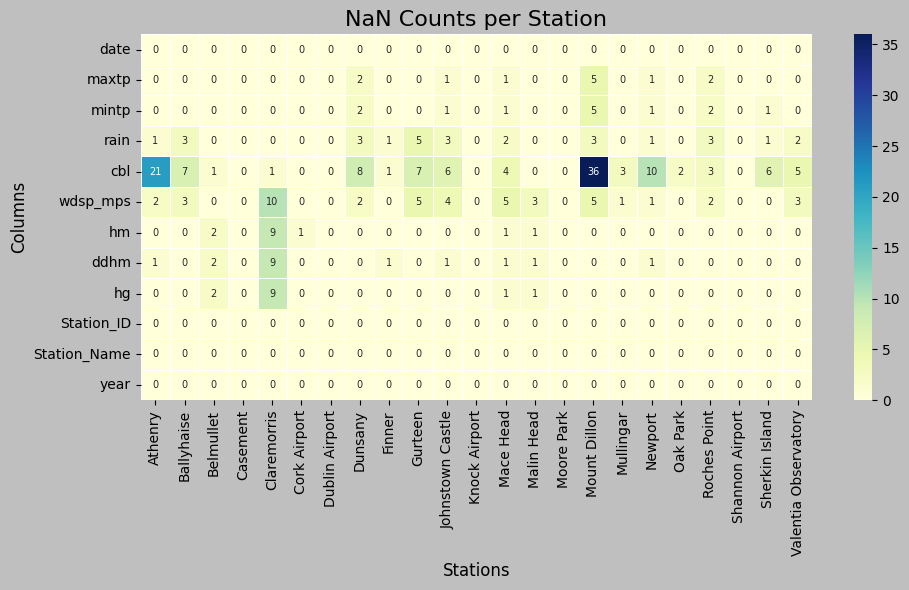

In [10]:
# Create a heatmap of NaN counts per station and column
plt.figure(figsize=(10, 6))  # the size
sns.heatmap(nan_counts_per_station.T, cmap='YlGnBu', annot=True, annot_kws={'size': 7}, fmt='d', linewidths=0.5)

plt.title("NaN Counts per Station", fontsize=16)
plt.xlabel("Stations", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.xticks(rotation=90) 
plt.yticks(rotation=0)   

plt.tight_layout()

Analyzing the heatmap and focusing on the variable of interest, wind speed (wdsp_mps), I observe some missing data. However, the amount of missing data is relatively small and manageable. I need to deal with it anyway. First, I сreate a copy of the dataset to ensure that modifications do not inadvertently affect the original data or other references to the dataframe. Then, I fill the missing values in the `wdsp_mps` column with the median value of the existing data for that column. This ensures that the imputed values are representative of the central tendency of the data, minimizing bias introduced during the filling process. 

I used median instead of dropping the rows because the dataset has a temporal structure. Although the amount of missing data is very small, removing rows could disrupt trends, seasonal patterns, or other temporal analyses essential for studying wind speed variations over time.

In [11]:
# Copy the dataset
df_2010_2024 = df_2010_2024.copy()

# Fill missing values with the median
df_2010_2024['wdsp_mps'] = df_2010_2024['wdsp_mps'].fillna(df_2010_2024['wdsp_mps'].median())

In [12]:
# Ensure the missing values are gone
df_2010_2024['wdsp_mps'].isna().sum()

np.int64(0)

***

## Monthly variations

The next step is to calculate the monthly average wind speed for each station using the `groupby()` and `resample()` methods. This allows us to get the mean wind speed for each station for each month.

In [13]:
# This line sets the 'date' column as the index for df, modifying the DataFrame in place.
df_2010_2024.set_index('date', inplace=True)

In [14]:
# Group by Station_Name and calculate the monthly mean for wind speed
monthly_mean_wind_speed = df_2010_2024.groupby("Station_Name")['wdsp_mps'].resample('ME').mean()

Based on the monthly average wind speed data, I construct a heatmap to visually represent the variation in wind speeds across stations. By resetting the index and pivoting the data, we create a matrix where each row corresponds to a station and each column to a month (removed for better visualisation).

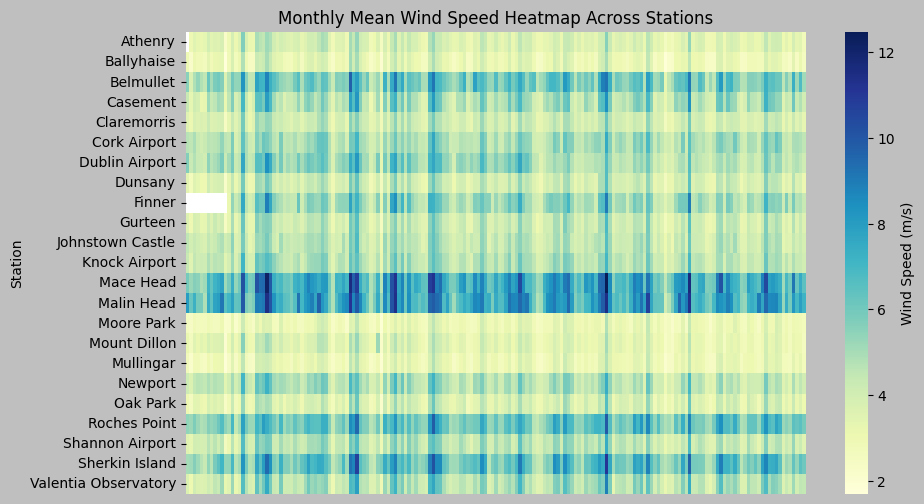

In [15]:
heatmap_data = monthly_mean_wind_speed.reset_index().pivot(index='Station_Name', columns='date', values='wdsp_mps')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Wind Speed (m/s)'})
plt.title("Monthly Mean Wind Speed Heatmap Across Stations")
plt.xlabel("")  # Remove x-axis label
plt.xticks([])  # Remove x-axis tick labels
plt.ylabel("Station");

Based on the heatmap, I can observe that the highest monthly average wind speeds from 2010 to the present have been recorded at the following stations:

1. Malin Head
2. Mace Head 
3. Roches Point
4. Sherkin Island
5. Belmullet


To better understand the distribution of the variable `monthly_mean_wind_speed` across each station from 2010 to the present, I create compact plots using the **Seaborn** library. These plots will help visualize how the wind speed fluctuates over time at each station, providing clearer insights into the patterns and trends of wind speeds at different locations.

Text(0.5, 1.02, 'Monthly Mean Wind Speed Across Stations')

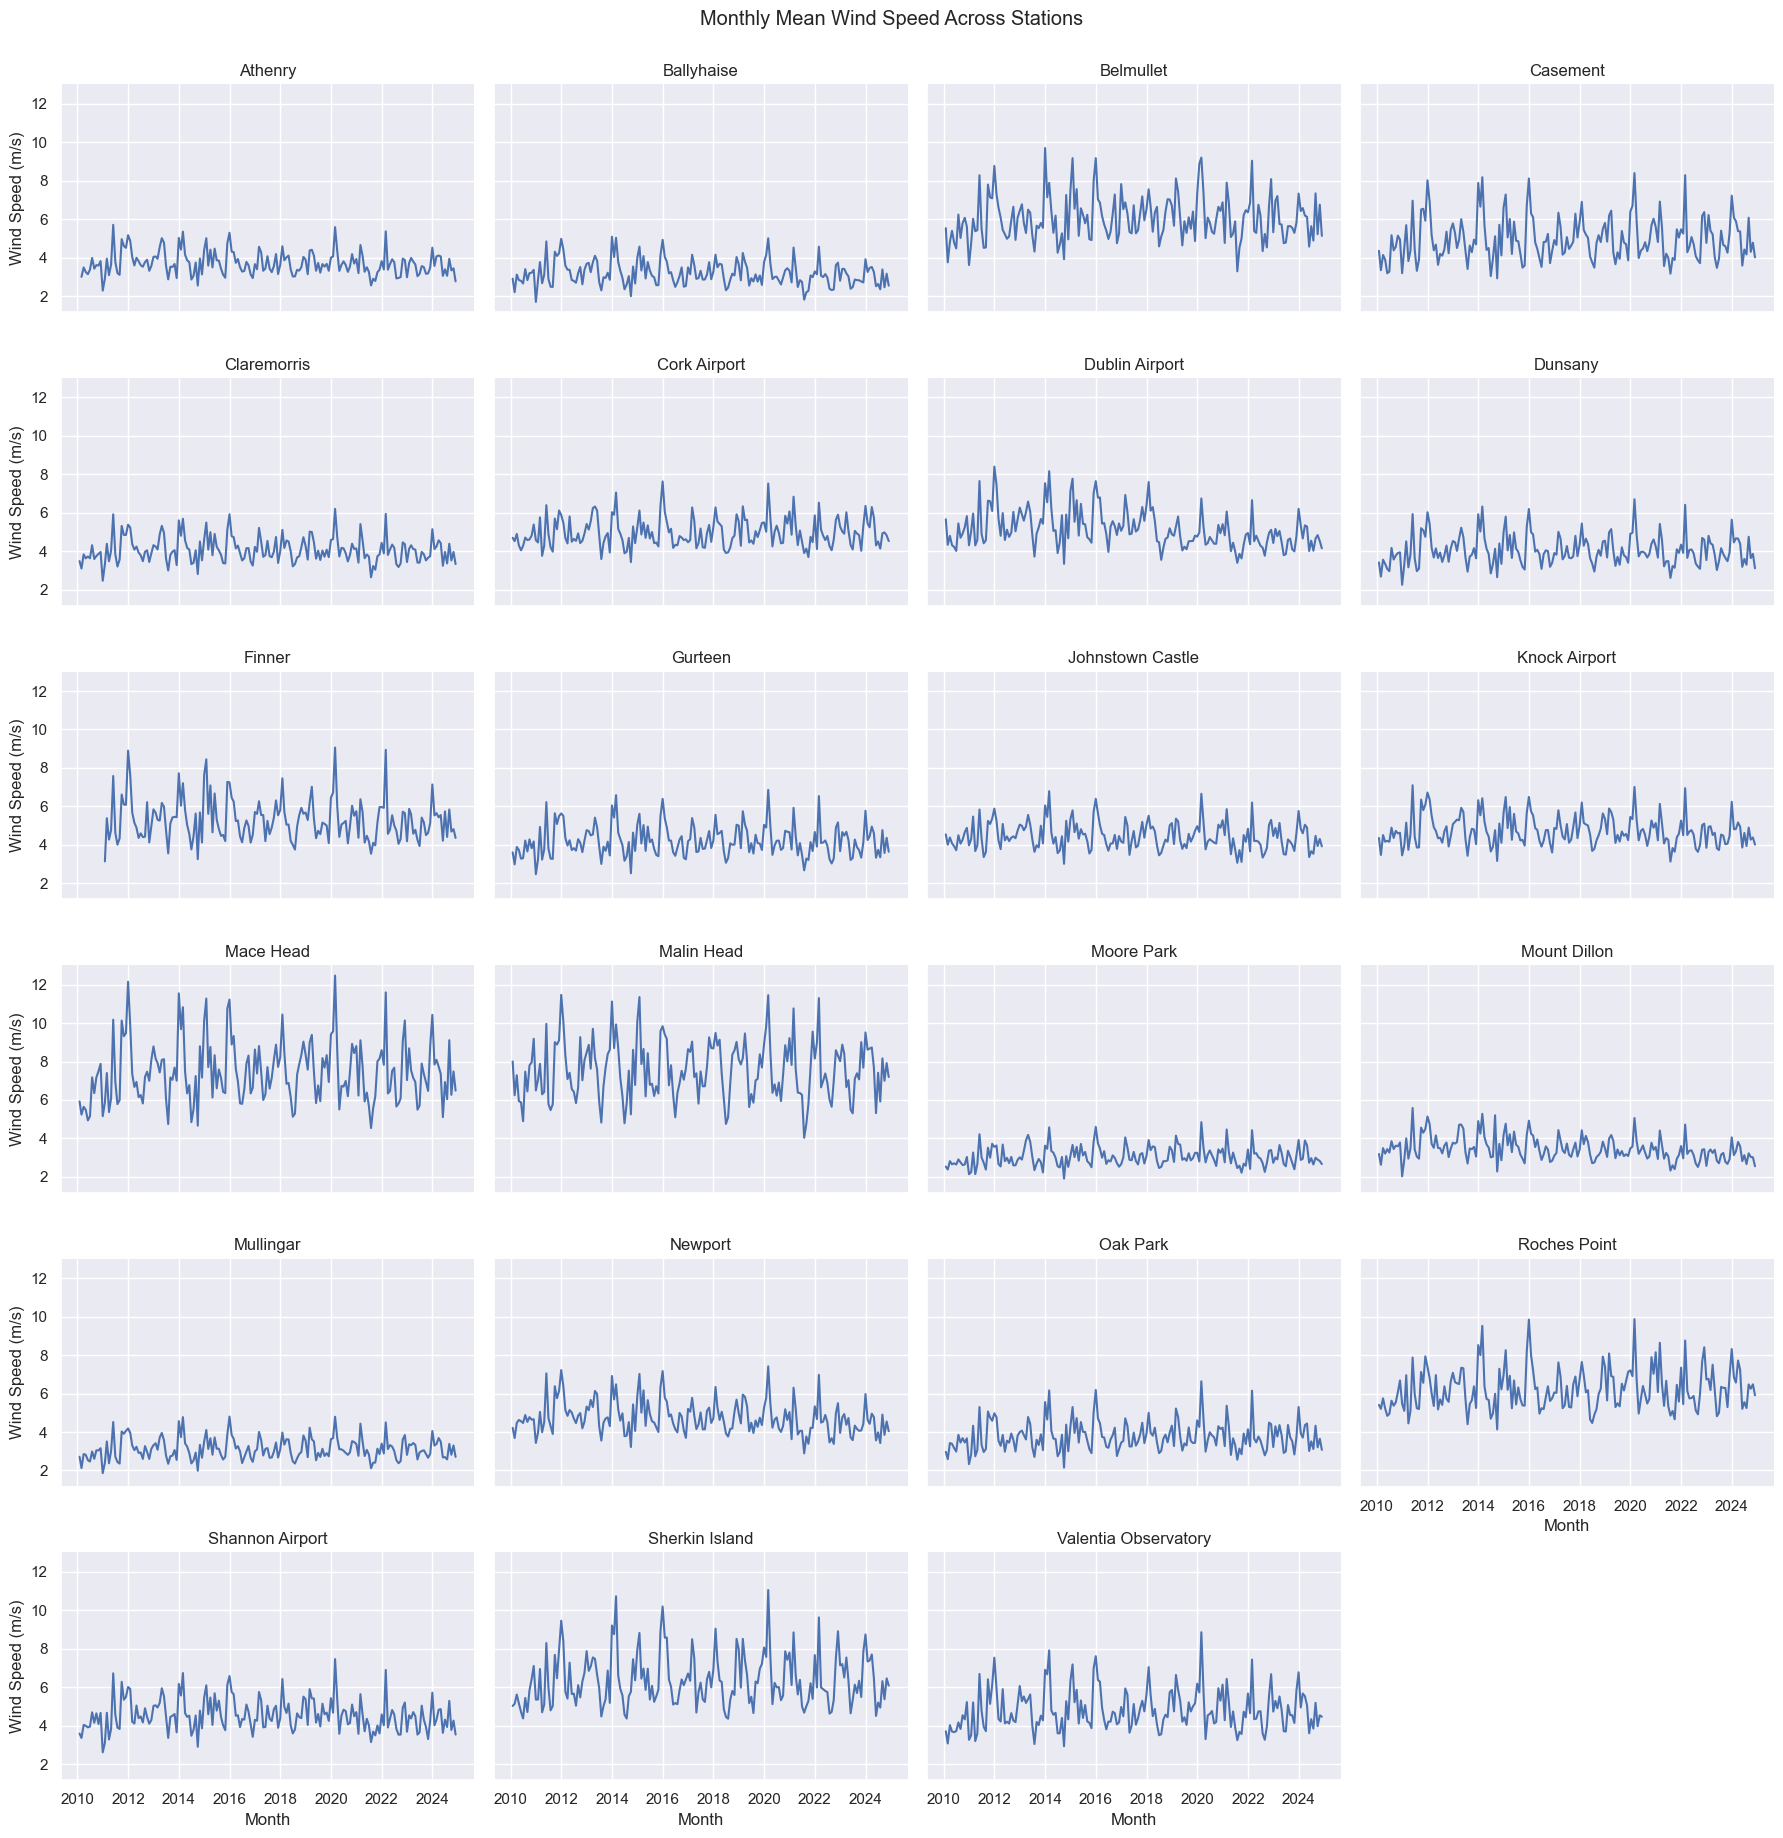

In [16]:
data_for_plot = monthly_mean_wind_speed.reset_index()
sns.set(style="darkgrid")
g = sns.FacetGrid(data_for_plot, col="Station_Name", col_wrap=4, height=3, aspect=1.5, sharey=True)
g.map(sns.lineplot, "date", "wdsp_mps")
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Wind Speed (m/s)")
g.fig.suptitle("Monthly Mean Wind Speed Across Stations", y=1.02)

#### Observations:

The generated line plots of monthly mean wind speeds **from 2010 to 2024** for each station provide a comprehensive overview of wind speed trends and station-to-station comparisons.

**High Variability**:

Stations such as **Malin Head, Mace Head, Roches Point, Sherkin Island,** and **Belmullet** exhibit the largest fluctuations in wind speed. These are likely coastal or exposed locations prone to stronger and more variable wind conditions due to their geographical positioning.

**Low Variability**:

Stations such as **Mullingar, Moore Park, Mount Dillon**, and **Ballyhaise** demonstrate minimal variation in monthly wind speeds, reflecting relatively stable conditions. These might be inland stations less affected by marine influences.

**Stability in Trends**:

A stable trend is observed in most stations, suggesting consistent wind speeds over the years. Seasonal patterns may dominate the variability.

**Unique Behavior**:

The station **Dublin Airport** shows a noticeable reduction in wind speed variability, which could result from localized changes such as urban development, alterations in instrumentation, or other environmental factors.

**Conclusion**:

These plots are instrumental in understanding wind speed trends across Ireland. They allow for an easy comparison of stations with significant variability to those with more stable wind conditions. Stations with unique behaviors, such as Dublin Airport, could warrant further investigation to explore underlying causes.


***

## Seasonal variations

Now I create plot, the purpose of which is to visualize the seasonal variations in the average wind speed across different weather stations for the entire period from 2010 to 2024. The data is grouped by station and season to observe how wind speed changes with the seasons. This analysis will help identify seasonal wind patterns and provide insights into the climate characteristics of different regions.

In [17]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in [11, 12, 1]:
        return 'Winter'
    elif month in [2, 3, 4]:
        return 'Spring'
    elif month in [5, 6, 7]:
        return 'Summer'
    elif month in [8, 9, 10]:
        return 'Autumn'

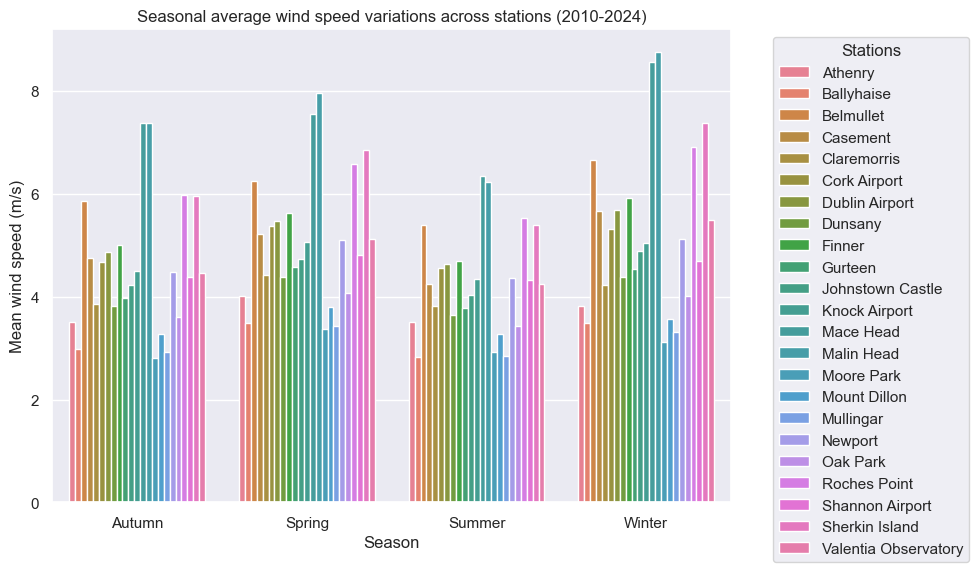

In [18]:
# Add a 'Season' column to the data
data_for_plot['Season'] = data_for_plot['date'].dt.month.apply(get_season)

# Group by Station_Name and Season, then calculate the mean wind speed
seasonal_mean_wind_speed = (
    data_for_plot.groupby(['Station_Name', 'Season'])['wdsp_mps'].mean().reset_index()
)

# Plot seasonal variations
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(data=seasonal_mean_wind_speed, x='Season', y='wdsp_mps', hue='Station_Name', errorbar=None)

plt.title("Seasonal average wind speed variations across stations (2010-2024)")
plt.xlabel("Season")
plt.ylabel("Mean wind speed (m/s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Stations")
plt.tight_layout()

On the graph, I observe that the wind behavior across different stations supports the pattern seen in the previous graph. It is clear which stations record the highest average wind speeds and which record the lowest. However, the aim of this graph was to highlight the overall seasonal trend. It shows that wind speeds are strongest in **winter**, followed by **spring**, then **autumn**, with the lowest speeds observed in **summer**.

In [19]:
seasonal_wind_speed_table = seasonal_mean_wind_speed.pivot(
    index='Station_Name', 
    columns='Season',     
    values='wdsp_mps'      
)

seasonal_wind_speed_table = seasonal_wind_speed_table.loc[
    seasonal_wind_speed_table['Winter'].sort_values(ascending=False).index
]
seasonal_wind_speed_table = seasonal_wind_speed_table.loc[
    seasonal_wind_speed_table['Spring'].sort_values(ascending=False).index
]
seasonal_wind_speed_table = seasonal_wind_speed_table.loc[
    seasonal_wind_speed_table['Autumn'].sort_values(ascending=False).index
]
seasonal_wind_speed_table = seasonal_wind_speed_table.loc[
    seasonal_wind_speed_table['Summer'].sort_values(ascending=False).index
]

# Show
print(seasonal_wind_speed_table)

Season                  Autumn    Spring    Summer    Winter
Station_Name                                                
Mace Head             7.375244  7.547564  6.352265  8.553042
Malin Head            7.371008  7.966054  6.229452  8.755515
Roches Point          5.978734  6.578525  5.521157  6.913368
Belmullet             5.850809  6.249797  5.397433  6.658694
Sherkin Island        5.956498  6.849061  5.395667  7.370768
Finner                5.004024  5.626189  4.698541  5.912147
Dublin Airport        4.871678  5.461797  4.632986  5.692537
Cork Airport          4.678900  5.378369  4.554967  5.313689
Newport               4.484358  5.091907  4.367713  5.112048
Knock Airport         4.506025  5.071502  4.349298  5.037897
Shannon Airport       4.376387  4.815511  4.323826  4.699878
Casement              4.745057  5.225901  4.255103  5.673098
Valentia Observatory  4.460823  5.119484  4.243081  5.498380
Johnstown Castle      4.227425  4.739043  4.032562  4.883296
Claremorris           3.

### Observations:

The picture is from this resource [Wind turbine design](https://en.wikipedia.org/wiki/Wind_turbine_design): 

![Powercurve](https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Powercurve.png/800px-Powercurve.png)

Summary, wind turbines used in large-scale wind farms typically have operational wind speed ranges that determine when they can generate electricity safely and efficiently. These ranges are as follows:

**Cut-in Wind Speed**: This is the minimum wind speed at which turbines begin to operate. It is generally around 3–5 m/s (approximately 10.8–18 km/h).

**Rated Wind Speed**: This is the wind speed at which turbines produce their maximum power output. It is usually between 12–15 m/s (approximately 43–54 km/h).

**Cut-out Wind Speed**: This is the maximum wind speed at which turbines shut down to avoid damage. This threshold is typically around 20–25 m/s (approximately 72–90 km/h)

Based on the operational parameters of wind turbines, all stations listed demonstrate potential for wind farm development, but their viability varies by location. Stations like **Mace Head, Malin Head, Sherkin Island, Belmullet,** and **Roches Point** exhibit the highest monthly and seasonal average wind speeds, making them particularly suitable for wind energy projects. These regions are likely to provide stable and efficient wind flow, maximizing turbine output.

However, lower-performing stations like **Mount Dillon** and **Oak Park**, with comparatively reduced wind speeds, may still serve as supplementary or backup sites but would require detailed feasibility studies to justify investment. Overall, the combination of seasonal trends and monthly averages suggests prioritizing the top-performing stations for optimal wind energy harnessing.

*** 
## Analysis by station 

By analysing wind speed data from meteorological stations across Ireland, we can estimate the likelihood of a chosen wind turbine (e.g., **Siemens SWT-3.2-113**) operating within its power output range. Using the turbine's technical specifications and power calculation formula, we can assess its performance over time (from 2010 to present). This analysis helps predict how often the turbine will operate at different power levels, taking into account seasonal variations and extreme wind conditions, providing insights into its efficiency and reliability.

In this analysis, data from the **Malin Head** weather station was used as an example. However, similar research can be conducted using data from any other station to analyse and evaluate the performance of a wind turbine based on the existing conditions.

The provided code defines and utilizes the `StationProcessor` class to preprocess meteorological data.

**Processing Workflow**:
1. The data is loaded from the specified file, retaining only the specified columns.
2. Wind speed is converted from knots to meters per second (m/s) for uniform units of measurement.
3. Missing values in column `wdsp_mps` are replaced with the median to ensure completeness.
4. Dataset details, such as the time period and summary statistics, are provided.

**Outcome**: 
The resulting dataset includes wind speed in the correct units (m/s), with missing values for `wdsp_mps` replaced by the median, and is complete and ready for further analysis.

In [20]:
from analysis_by_station import StationProcessor

# Specify the file path to the data and the columns of interest
file_path = "./Data/Malin Head_station_1575.csv"
columns_of_interest = ["date", "maxtp", "mintp", "rain", "cbl", "wdsp", "hm", "ddhm", "hg"]

# Create an instance of the StationProcessor
processor = StationProcessor(file_path, columns_of_interest)

# Run the processing workflow
processed_data = processor.run()


Missing values in 'wdsp_mps' have been filled with the median: 7.5108824
Station Name: Malin Head

Data Period: From 1955-05-01 to 2024-11-30

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25417 entries, 0 to 25416
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      25417 non-null  datetime64[ns]
 1   maxtp     25417 non-null  float64       
 2   mintp     25417 non-null  float64       
 3   rain      25417 non-null  float64       
 4   cbl       25417 non-null  float64       
 5   wdsp_mps  25417 non-null  float64       
 6   hm        25337 non-null  float64       
 7   ddhm      25337 non-null  float64       
 8   hg        25337 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 1.7 MB

SUMMARY:
------------------------------
              maxtp         mintp          rain           cbl      wdsp_mps
count  25417.000000  25417.000000  25417.000000 

In [21]:
# Create a subset of the data starting from the year 2010
data_from_2010 = processed_data[processed_data['date'] >= '2010-01-01']

# Copy the dataset
data_from_2010 = data_from_2010.copy()

# Display
data_from_2010.head()

,date,maxtp,mintp,rain,cbl,wdsp_mps,hm,ddhm,hg
19969,2010-01-01,6.0,-0.5,0.5,1009.2,2.983775,17.0,350.0,21.0
19970,2010-01-02,6.7,3.0,4.2,1017.2,10.340324,30.0,320.0,41.0
19971,2010-01-03,3.8,0.0,0.1,1024.6,5.916106,19.0,90.0,24.0
19972,2010-01-04,5.4,0.7,3.8,1016.6,5.864662,33.0,10.0,42.0
19973,2010-01-05,5.0,1.8,0.5,1007.5,12.398100,34.0,40.0,42.0


***

## Wind Power output calculation using Siemens SWT-3.2-113 turbine

The idea for calculating wind power output using wind turbines was derived from this resource:  
[**Wind Energy Simplified - From Basics to Advanced Power Calculation with Complete Python Code**](https://medium.com/@thebinayak/wind-energy-simplified-from-basics-to-advanced-power-calculation-with-complete-python-code-4d3ec3cb0023).  

The wind turbine **Siemens SWT-3.2-113** was chosen for this analysis due to its usage in the [**Mayo Wind Farm Oweninny**](https://www.oweninnywindfarm.ie/the-wind-farm/), as referenced in the Wikipedia article [**List of wind farms in the Republic of Ireland**](https://en.wikipedia.org/wiki/List_of_wind_farms_in_the_Republic_of_Ireland). This turbine was analyzed based on average wind speeds from the study station, demonstrating its suitability for such conditions, as supported by its technical specifications described in the [**Wind power density**](https://en.wikipedia.org/wiki/Wind_turbine#Wind_power_density) article.

**Sources for turbine specifications**:
- [**Siemens SWT-3.2-113**](https://en.wind-turbine-models.com/turbines/966-siemens-swt-3.2-113)  
- [**Manufacturers and turbines > Siemens > SWT-3.2-113**](https://www.thewindpower.net/turbine_en_887_siemens_swt-3.2-113.php)

Although the **Siemens SWT-3.2-113** turbine has been discontinued, as mentioned in [**Siemens Gamesa - Wikipedia**](https://en.wikipedia.org/wiki/Siemens_Gamesa#cite_note-SWT-3.2-113-92), it provides a practical example for demonstrating power output calculations. These calculations incorporate wind speed data and turbine efficiency to estimate the actual power output under real-world conditions, rather than merely analysing the wind energy potential.


The formula for calculating the power from a wind turbine is from this resource [How Much Energy Will My System Generate?](https://windexchange.energy.gov/small-wind-guidebook#generate):


$Power (P) = Cp * 1/2 * ρ * A * V^3$

Where:

- $P$: Power output, watts  
- $Cp$: Maximum power coefficient, ranging from 0.25 to 0.45, dimensionless (theoretical maximum = 0.59)  
- $ρ$: Air density, kg/m³  
- $A$: Rotor swept area, m² or  
  $π *D^2 / 4$ ($D$ is the rotor diameter in m, $π$ = 3.1416)  
- $V$: Wind speed, mps

In [22]:
# Initialize a new column with zero values for power output
data_from_2010["power_output_kW_Siemens SWT-3.2-113"] = 0

# Ensure the new column is of type float64
data_from_2010["power_output_kW_Siemens SWT-3.2-113"] = data_from_2010["power_output_kW_Siemens SWT-3.2-113"].astype(float)

# Define parameters for power calculation
turbine_diameter = 113.0
turbine_efficiency = 0.35 # Betz Limit is 16/27=0.59 (theoretical maximum), usually ranges between 0.25 and 0.45 in practice
air_density = 1.225  # Air density in kg/m³
swept_area = 10000.0  # Approximation of the rotor's swept area in m²
max_power = 3200  # Maximum turbine power output in kW
survival_wind_speed = 59.5  # Maximum wind speed the turbine can structurally withstand without damage (non-operational state).

# Iterate over rows to calculate power output based on wind speed
for index, wind_speed in data_from_2010["wdsp_mps"].items():
    if wind_speed < 3:
        power_output = 0  # Power output is 0 for wind speeds below 3 m/s
    elif wind_speed > 25:
        power_output = 0  # Power output is 0 for wind speeds above 25 m/s
    elif 13.5 < wind_speed <= 25:
        power_output = max_power  # Cap power output at 3200 kW for wind speeds between 13.5 and 25 m/s
    elif wind_speed > survival_wind_speed:
        # Mark unsafe operating conditions for wind speeds exceeding the survival limit
        power_output = -1  # Special value indicating survival wind speed exceeded
    else:
        # Calculate power output for wind speeds between 3 and 13.5 m/s using the power formula
        power_output = (0.5 * air_density * swept_area * (wind_speed ** 3) * turbine_efficiency) / 1000  # Result in kW

    if power_output > max_power:
        power_output = max_power  # Ensure power output does not exceed maximum rated power

    # Store the calculated power output in the corresponding column
    data_from_2010.loc[index, "power_output_kW_Siemens SWT-3.2-113"] = power_output

# Display the first few rows to verify results
print(data_from_2010[["wdsp_mps", "power_output_kW_Siemens SWT-3.2-113"]].head(10).to_string(index=False))


 wdsp_mps  power_output_kW_Siemens SWT-3.2-113
 2.983775                             0.000000
10.340324                          2370.154348
 5.916106                           443.896763
 5.864662                           432.417250
12.398100                          3200.000000
 8.436882                          1287.419256
 3.806886                           118.272456
 3.703997                           108.939643
 3.961219                           133.247979
13.324100                          3200.000000


In [23]:
# Initialize a new column for power ranges with default value "0 kW"
data_from_2010["power_range"] = "0 kW"

# Assign the corresponding power ranges based on the values in "power_output_kW_Siemens SWT-3.2-113"
data_from_2010.loc[data_from_2010["power_output_kW_Siemens SWT-3.2-113"] == 0, "power_range"] = "0 kW"
data_from_2010.loc[(data_from_2010["power_output_kW_Siemens SWT-3.2-113"] > 0) & 
                    (data_from_2010["power_output_kW_Siemens SWT-3.2-113"] <= 1000), "power_range"] = "0-1000 kW"
data_from_2010.loc[(data_from_2010["power_output_kW_Siemens SWT-3.2-113"] > 1000) & 
                    (data_from_2010["power_output_kW_Siemens SWT-3.2-113"] <= 2000), "power_range"] = "1000-2000 kW"
data_from_2010.loc[(data_from_2010["power_output_kW_Siemens SWT-3.2-113"] > 2000) & 
                    (data_from_2010["power_output_kW_Siemens SWT-3.2-113"] < 3200), "power_range"] = "2000-3200 kW"
data_from_2010.loc[data_from_2010["power_output_kW_Siemens SWT-3.2-113"] == 3200, "power_range"] = "3200 kW"
data_from_2010.loc[data_from_2010["power_output_kW_Siemens SWT-3.2-113"] == -1, "power_range"] = "Wind > Survival Speed"

# Display the result
print(data_from_2010[["wdsp_mps", "power_output_kW_Siemens SWT-3.2-113", "power_range"]].head().to_string(index=False))


 wdsp_mps  power_output_kW_Siemens SWT-3.2-113  power_range
 2.983775                             0.000000         0 kW
10.340324                          2370.154348 2000-3200 kW
 5.916106                           443.896763    0-1000 kW
 5.864662                           432.417250    0-1000 kW
12.398100                          3200.000000      3200 kW


In [24]:
# Count the number of occurrences in each power range
power_range_by_day = data_from_2010["power_range"].value_counts()

# Calculate the total number of occurrences
total_days = power_range_by_day.sum()

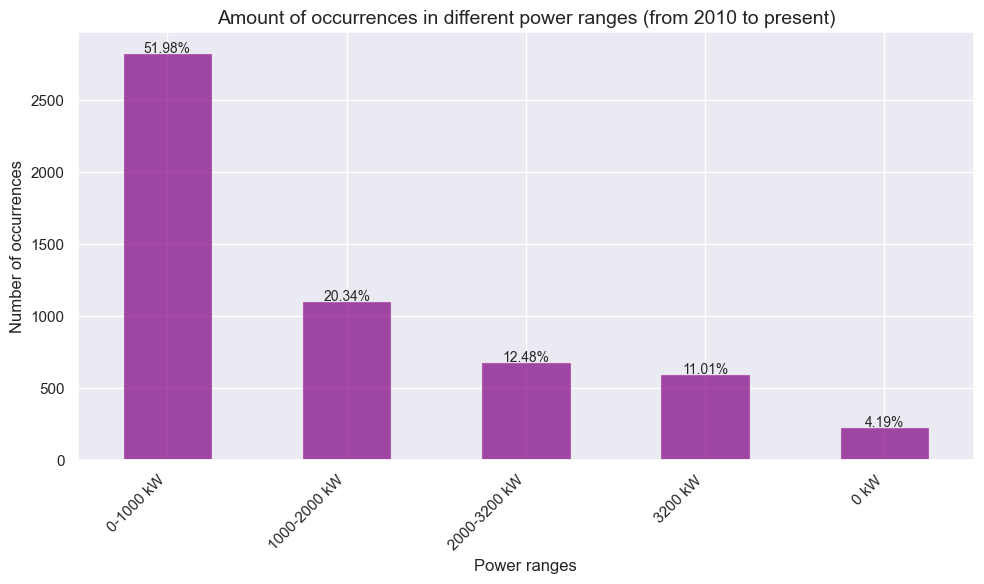

In [25]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
power_range_by_day.plot(kind="bar", color="purple", ax=ax, alpha = 0.7)

# Add the percentage labels on top of each bar
for i, count in enumerate(power_range_by_day):
    percentage = (count / total_days) * 100
    ax.text(i, count + 0.1, f'{percentage:.2f}%', ha='center', fontsize=10)

# Graph formatting
plt.title("Amount of occurrences in different power ranges (from 2010 to present)", fontsize=14)
plt.xlabel("Power ranges", fontsize=12)
plt.ylabel("Number of occurrences", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

The graph demonstrates the good potential for effective operation of the wind turbine in this location. The turbine's idle time (when power output is 0 kW) accounts for only **4.19%** of occurrences, indicating that the turbine is operational more than **95%** of the time. This result highlights the suitability of this location for wind energy generation and underscores the potential for further exploration of wind conditions and directions to optimize decision-making processes.

**Observed Trends**:

The largest proportion of occurrences (**51.98%**) falls within the 0-1000 kW range, showing frequent low to moderate power generation.
Significant power outputs between 1000-2000 kW make up **20.34%**, with an additional **12.48%** in the 2000-3200 kW range.
Maximum power output (3200 kW) is achieved **11.01%** of the time, showcasing the turbine's capability to reach its full potential under suitable wind conditions.

**Conclusion**:

These results affirm the viability of using wind turbines in this area, with operational downtime being minimal. While wind is inherently variable, this analysis demonstrates its stability and consistency in the region, which supports further investigation into wind patterns, directions, and extreme conditions.

*** 


## Time-Series Forecasting

In [26]:
data_ML = processed_data.copy()
data_ML['year'] = data_ML['date'].dt.year

def get_season(month):
    if month in [11, 12, 1]:
        return 'Winter'
    elif month in [2, 3, 4]:
        return 'Spring'
    elif month in [5, 6, 7]:
        return 'Summer'
    else:
        return 'Autumn'

data_ML['season'] = data_ML['date'].dt.month.apply(get_season)

data_seasonal = data_ML.groupby(['year', 'season']).agg({'wdsp_mps': 'mean'}).reset_index()

season_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}
data_seasonal['season_ordinal'] = data_seasonal['season'].map(season_mapping)

data_seasonal['year_season_ordinal'] = data_seasonal['year'] + data_seasonal['season_ordinal'] / 10.0

X = data_seasonal[['year_season_ordinal']] 
y = data_seasonal['wdsp_mps'] 


Mean Squared Error: 1.5992
Mean Absolute Error: 0.9871
R^2 Score: -0.3391
MAPE: 14.59%


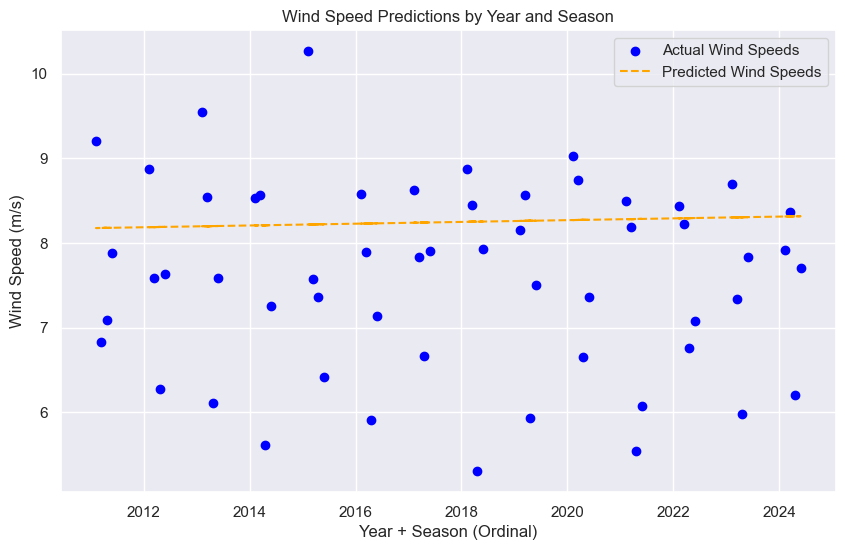

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R^2 Score: {r2_score:.4f}")

y_test_corrected = y_test.replace(0, 0.01)
mape = mean_absolute_percentage_error(y_test_corrected, y_pred)
print(f"MAPE: {mape * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual Wind Speeds', color='blue', marker='o')
plt.plot(X_test, y_pred, label='Predicted Wind Speeds', color='orange', linestyle='--')
plt.xlabel('Year + Season (Ordinal)')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Predictions by Year and Season')
plt.legend()
plt.grid(True)

Mean Squared Error (MSE): 0.4057
Mean Absolute Error (MAE): 0.5282
Mean Absolute Percentage Error (MAPE): 6.99%


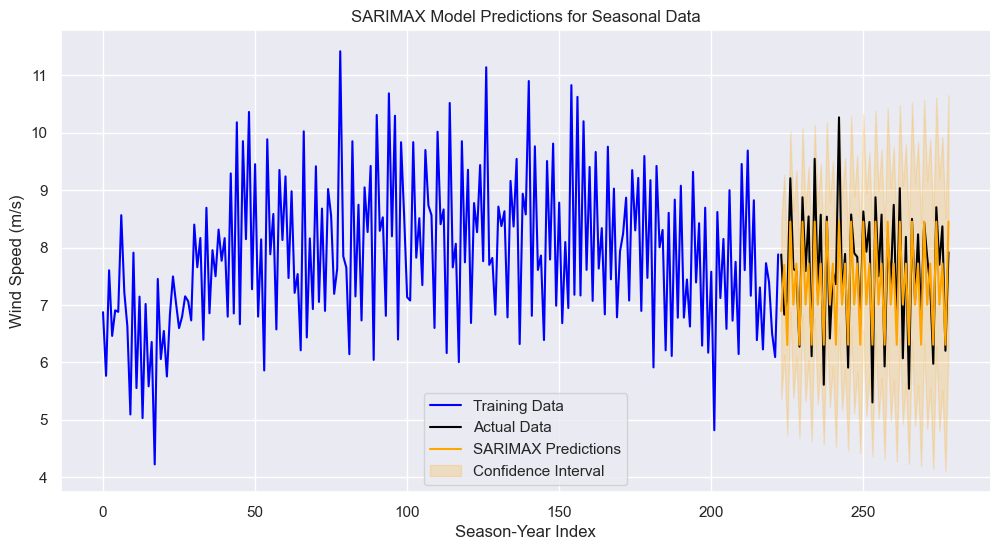

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

data_seasonal = data_seasonal.copy()

data_seasonal['season_year'] = data_seasonal['year'].astype(str) + '-' + data_seasonal['season']

data_seasonal['season_index'] = pd.factorize(data_seasonal['season_year'])[0]
data_seasonal.set_index('season_index', inplace=True)

y = data_seasonal['wdsp_mps']

train_size = int(len(y) * 0.8)
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

SARIMAXmodel = SARIMAX(
    y_train,
    order=(1, 0, 0),  
    seasonal_order=(1, 1, 1, 4),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

y_pred = SARIMAXmodel.get_forecast(steps=len(y_test))

y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = y_pred.predicted_mean

y_pred_df.index = y_test.index

y_pred_out = y_pred_df["Predictions"]

mse = mean_squared_error(y_test, y_pred_out)
mae = mean_absolute_error(y_test, y_pred_out)
mape = mean_absolute_percentage_error(y_test.replace(0, 0.01), y_pred_out)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Training Data', color='blue')
plt.plot(y_test, label='Actual Data', color='black')
plt.plot(y_pred_out, label='SARIMAX Predictions', color='orange')

plt.fill_between(y_pred_df.index, y_pred_df.iloc[:, 0], y_pred_df.iloc[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

plt.xlabel('Season-Year Index')
plt.ylabel('Wind Speed (m/s)')
plt.title('SARIMAX Model Predictions for Seasonal Data')
plt.legend()
plt.grid(True)

***

# End